In [1]:
import ROOT
from rootpy.io import root_open
from rootpy.plotting import Canvas, set_style, Legend
from tools.analysis import measurement
from tools import categories
from IPython.display import Image
import uuid
import math
#import rootnotes
#%matplotlib inline
set_style('ATLAS', shape='rect')

Welcome to JupyROOT 6.10/08


/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/inspect.py:253: RuntimeWarning: creating converter for unknown type "_Atomic(bool)"
  value = getattr(object, key)
INFO:rootpy.plotting.style] using ROOT style 'ATLAS(shape=rect)'


In [2]:
ll_file = '~/cernbox/workspaces/htt_fine_binning_jan15/leplep_17-12-08.all.MGZttShowerSys.mmc_mlm_WithTheoryEnv_WithModJERVar_fakes_1GeV.root'
lh_file = '~/cernbox/workspaces/htt_fine_binning_jan15/lephad_fs51_MMC_Fine_ouf.root'
hh_file = '~/cernbox/workspaces/htt_fine_binning_jan15/hhAll_merged_WSinput_WithTheoryEnv_WithModJERVar.root'

ll_rfile = root_open(ll_file)
lh_rfile = root_open(lh_file)
hh_rfile = root_open(hh_file)



In [3]:
ll_meas = measurement(ll_rfile, 'leplep')
lh_meas = measurement(lh_rfile, 'lephad')
hh_meas = measurement(hh_rfile, 'hadhad')

In [4]:
ll_cat_vbf_sr = categories['leplep_vbf_sr']
lh_cat_vbf_sr = categories['lephad_vbf_sr']
hh_cat_vbf_sr = categories['hadhad_vbf']

ll_cat_bst_sr = categories['leplep_boost_sr']
lh_cat_bst_sr = categories['lephad_boost_sr']
hh_cat_bst_sr = categories['hadhad_boost']



measurements = [ll_meas, lh_meas, hh_meas]
category_vbf_list = [ll_cat_vbf_sr, lh_cat_vbf_sr, hh_cat_vbf_sr]
category_bst_list = [ll_cat_bst_sr, lh_cat_bst_sr, hh_cat_bst_sr]


jet_nps = [
    ('jet_jer_np0_high', 'jet_jer_np0_low'),
    ('jet_jer_np1_high', 'jet_jer_np1_low'),
    ('jet_jer_np2_high', 'jet_jer_np2_low'),
    ('jet_jer_np3_high', 'jet_jer_np3_low'),
    ('jet_jer_np4_high', 'jet_jer_np4_low'),
    ('jet_jer_np5_high', 'jet_jer_np5_low'),
    ('jet_jer_np6_high', 'jet_jer_np6_low'),
    ('jet_jer_np7_high', 'jet_jer_np7_low'),
    ('jet_jer_np8_high', 'jet_jer_np8_low'),
    ('jet_jer_crosscalibfwd_high', 'jet_jer_crosscalibfwd_low'),
    ('jet_jer_noisefwd_high', 'jet_jer_noisefwd_low'),
    ('jet_jes_bjes_response_high', 'jet_jes_bjes_response_low'),
    ('jet_jes_effectivenp_1_high', 'jet_jes_effectivenp_1_low'),
    ('jet_jes_effectivenp_2_high', 'jet_jes_effectivenp_2_low'),
    ('jet_jes_effectivenp_3_high', 'jet_jes_effectivenp_3_low'),
    ('jet_jes_effectivenp_4_high', 'jet_jes_effectivenp_4_low'),
    ('jet_jes_effectivenp_5_high', 'jet_jes_effectivenp_5_low'),
    ('jet_jes_effectivenp_6_high', 'jet_jes_effectivenp_6_low'),
    ('jet_jes_effectivenp_7_high', 'jet_jes_effectivenp_7_low'),
    ('jet_jes_effectivenp_8restterm_high', 'jet_jes_effectivenp_8restterm_low'),
    ('jet_jes_etaintercalibration_modelling_high', 'jet_jes_etaintercalibration_modelling_low'),
    ('jet_jes_etaintercalibration_nonclosure_high', 'jet_jes_etaintercalibration_nonclosure_low'),
    ('jet_jes_etaintercalibration_totalstat_high', 'jet_jes_etaintercalibration_totalstat_low'),
    ('jet_jes_flavor_composition_high', 'jet_jes_flavor_composition_low'),
    ('jet_jes_flavor_response_high', 'jet_jes_flavor_response_low'),
    ('jet_jes_pileup_offsetmu_high', 'jet_jes_pileup_offsetmu_low'),
    ('jet_jes_pileup_offsetnpv_high', 'jet_jes_pileup_offsetnpv_low'),
    ('jet_jes_pileup_ptterm_high', 'jet_jes_pileup_ptterm_low'),
    ('jet_jes_pileup_rhotopology_high', 'jet_jes_pileup_rhotopology_low'),
    ('jet_jes_punchthrough_mc15_high', 'jet_jes_punchthrough_mc15_low'),
    ('jet_jes_singleparticle_highpt_high', 'jet_jes_singleparticle_highpt_low'),
    ('jet_jvteff_high', 'jet_jvteff_low'),
    ('jet_fjvteff_high', 'jet_fjvteff_low'),
    ('met_softtrk_resopara_high', ''),
    ('met_softtrk_resoperp_high', ''),
    ('met_softtrk_scale_high', 'met_softtrk_scale_low'),
]


tau_nps = [
    ('tau_eff_eleolr_trueelectron_high', 'tau_eff_eleolr_trueelectron_low'),
    ('tau_eff_eleolr_truehadtau_high', 'tau_eff_eleolr_truehadtau_low'),
    ('tau_eff_jetid_highpt_high', 'tau_eff_jetid_highpt_low'),
    ('tau_eff_jetid_total_high', 'tau_eff_jetid_total_low'),
    ('tau_eff_reco_highpt_high', 'tau_eff_reco_highpt_low'),
    ('tau_eff_reco_total_high', 'tau_eff_reco_total_low'),
    ('tau_tes_detector_high', 'tau_tes_detector_low'),
    ('tau_tes_insitu_high', 'tau_tes_insitu_low'),
    ('tau_tes_model_high', 'tau_tes_model_low'),
]


electron_nps = [
    ('el_eff_id_high', 'el_eff_id_low'),
    ('el_eff_iso_high', 'el_eff_iso_low'),
    ('el_eff_reco_high', 'el_eff_reco_low'),
    ('el_eff_trigger_high', 'el_eff_trigger_low'),
    ('el_es_res_high', 'el_es_res_low'),
    ('el_es_scale_high', 'el_es_scale_low'),
    ('el_es_scale_e4scintillator_high', 'el_es_scale_e4scintillator_low'),
    ('el_es_scale_larcalib_high', 'el_es_scale_larcalib_low'),
    ('el_es_scale_lartemperature_extra2015pre_high', 'el_es_scale_lartemperature_extra2015pre_low'),
    ('el_es_scale_lartemperature_extra2016pre_high', 'el_es_scale_lartemperature_extra2016pre_low'),
]

muon_nps = [
    ('mu_eff_isostat_high', 'mu_eff_isostat_low'),
    ('mu_eff_isosys_high', 'mu_eff_isosys_low'),
    ('mu_eff_stat_high', 'mu_eff_stat_low'),
    ('mu_eff_statlowpt_high', 'mu_eff_statlowpt_low'),
    ('mu_eff_sys_high', 'mu_eff_sys_low'),
    ('mu_eff_syslowpt_high', 'mu_eff_syslowpt_low'),
    ('mu_eff_trigger_stat_high', 'mu_eff_trigger_stat_low'),
    ('mu_eff_trigger_sys_high', 'mu_eff_trigger_sys_low'),
    ('mu_es_id_high', 'mu_es_id_low'),
    ('mu_es_ms_high', 'mu_es_ms_low'),
    ('mu_es_sagitta_resbias_high', 'mu_es_sagitta_resbias_low'),
    ('mu_es_sagitta_rho_high', 'mu_es_sagitta_rho_low'),
    ('mu_es_scale_high', 'mu_es_scale_low'),
]

btag_nps = [
    ('btag_b_0_high', 'btag_b_0_low'),
    ('btag_b_1_high', 'btag_b_1_low'),
    ('btag_b_2_high', 'btag_b_2_low'),
    ('btag_c_0_high', 'btag_c_0_low'),
    ('btag_c_1_high', 'btag_c_1_low'),
    ('btag_c_2_high', 'btag_c_2_low'),
    ('btag_extrapolation_high', 'btag_extrapolation_low'),
    ('btag_extrapolation_from_charm_high', 'btag_extrapolation_from_charm_low'),
    ('btag_light_0_high', 'btag_light_0_low'),
    ('btag_light_1_high', 'btag_light_1_low'),
    ('btag_light_2_high', 'btag_light_2_low'),
    ('btag_light_3_high', 'btag_light_3_low'),
    ('btag_light_4_high', 'btag_light_4_low'),
]

pu_nps = [
    ('pu_prw_high', 'pu_prw_low'),
]



In [5]:


def np_summary_plot(meas_list, 
                    cats_list, 
                    systematics, 
                    sys_name='jet', 
                    sample_name='Ztt',
                    mass_window=None):

    
    if len(meas_list) != len(cats_list):
        raise ValueError('not the same number of measurements and category lists')


    length = sum(len(x) for x in cats_list)
    h_nom = ROOT.TH1F(uuid.uuid4().hex, 'np_summary', length, 0, length)
    g_nom = ROOT.TGraphAsymmErrors(length)
    h_sys = ROOT.TGraphAsymmErrors(length)
    meas_cat_unnested = []
    for meas, cats in zip(meas_list, cats_list):
        for cat in cats:
            meas_cat_unnested.append((meas, cat))
                          
    # iterate over measurements and category list
    for im, (meas, cat) in enumerate(meas_cat_unnested):
        samp = meas.get_sample(sample_name)

        if mass_window is None:
            bin_range = None
        else:
            bin_range = meas.bin_range(cat.cats[0], mass_window[0], mass_window[1])

        
        
        # retrieve yields as tuple (nominal, error)
        yields_nom = samp.yields(meas.rfile, cat.cats, name='nominal', bin_range=bin_range)
        h_nom.GetXaxis().SetBinLabel(im  + 1, cat.name)    
        h_nom.SetBinContent(im + 1, 1)    
        h_nom.SetBinError(im + 1, yields_nom[1] / yields_nom[0])    

        sqr_env_up = 0
        sqr_env_do = 0
        #print im + 1, cat.name, 'nominal', samp.yields(meas.rfile, cat.cats, name='nominal')[0]
        for (high, low) in systematics:
            yields_high = samp.yields(meas.rfile, cat.cats, name=high, bin_range=bin_range)[0]
            if low != '':
                yields_low = samp.yields(meas.rfile, cat.cats, name=low, bin_range=bin_range)[0]
            else:
                yields_low = 0.

            if yields_high > yields_low:
                yields_up = yields_high
                yields_do = yields_low
            else:
                yields_up = yields_low
                yields_do = yields_high

            if yields_up < yields_nom[0]:
                yields_do = min(yields_do, yields_up)
                yields_up = yields_nom[0] + (yields_nom[0] - max(yields_up, yields_do))
                
            if yields_do > yields_nom[0]:
                yields_up = max(yields_up, yields_do)
                yields_do = yields_nom[0] + (yields_nom[0] - min(yields_up, yields_do))
                
            if yields_do <= 0.:
                yields_do = yields_nom[0] + (yields_nom[0] - yields_up)

            #print im + 1, cat.name, high, yields_nom[0], yields_up, yields_do

            sqr_env_up += (yields_up - yields_nom[0])**2
            sqr_env_do += (yields_do - yields_nom[0])**2

        #print math.sqrt(sqr_env_up), math.sqrt(sqr_env_do)
        env_up = math.sqrt(sqr_env_up) / yields_nom[0] 
        env_do = math.sqrt(sqr_env_do) / yields_nom[0]
        stat_error = yields_nom[1] / yields_nom[0]      
        g_nom.SetPoint(im, im + 0.5, 1)
        g_nom.SetPointError(im, 0.5, 0.5, stat_error, stat_error)
        h_sys.SetPoint(im, im + 0.5, 1)
        h_sys.SetPointError(im, 0.5, 0.5, env_do, env_up)


        #print im + 1, cat.name, env_do, env_up
        
    h_nom.SetMarkerSize(0.0001)
    g_nom.SetFillStyle(3005)
    g_nom.SetFillColor(ROOT.kBlue)

    if mass_window is not None:
        h_nom.GetYaxis().SetRangeUser(0.1, 1.9)
    else:
        h_nom.GetYaxis().SetRangeUser(0.4, 1.6)
    h_nom.GetYaxis().SetTitle('Expected Yields Fractional Uncert.')
    h_nom.GetXaxis().SetTitle('signal region')
    h_nom.GetXaxis().SetLabelSize(0.7 * h_nom.GetXaxis().GetLabelSize())
    h_nom.GetYaxis().SetLabelSize(0.7 * h_nom.GetYaxis().GetLabelSize())
    h_nom.GetXaxis().SetTitleOffset(0.7 * h_nom.GetXaxis().GetTitleOffset())
    h_nom.GetYaxis().SetTitleOffset(0.5 * h_nom.GetYaxis().GetTitleOffset())
    h_nom.GetYaxis().SetTitleSize(0.8 * h_nom.GetYaxis().GetTitleSize())
    h_nom.GetXaxis().SetTitleSize(0.8 * h_nom.GetXaxis().GetTitleSize())

    
    h_sys.SetFillColor(ROOT.kRed)
    canv = ROOT.TCanvas(uuid.uuid4().hex, 'np_summary', 1000, 400)
    h_nom.Draw('HIST')
    h_sys.Draw('sameE2')
    h_nom.Draw('sameHIST')
    g_nom.Draw('same2')
    canv.RedrawAxis()

    leg = ROOT.TLegend(canv.GetLeftMargin() + 0.01, 0.7, 0.4, 0.9)
    leg.AddEntry(h_sys, sys_name + " NPs", 'f')
    leg.AddEntry(g_nom, "statistical uncert.", 'f')
    leg.SetTextSize(0.5 * leg.GetTextSize())
    leg.Draw('same')

    lat_str = meas_list[0].get_sample(sample_name).title + ' sample'
    if mass_window is not None:
        lat_str = '100 < MMC < 150, ' + lat_str
        lat = ROOT.TLatex(
            1 - canv.GetRightMargin() - 0.45, 
            1 - canv.GetTopMargin() - 0.1,
            lat_str)
    else:
        lat = ROOT.TLatex(
            1 - canv.GetRightMargin() - 0.2, 
            1 - canv.GetTopMargin() - 0.1,
            lat_str)
    lat.SetNDC(True)
    lat.Draw()
    return canv


        

In [6]:
c_j = np_summary_plot(measurements, category_vbf_list, jet_nps, sys_name='jes, jer, jvt, met')
c_t = np_summary_plot(measurements, category_vbf_list, tau_nps,      sys_name='tau')
c_e = np_summary_plot(measurements, category_vbf_list, electron_nps, sys_name='electron')
c_m = np_summary_plot(measurements, category_vbf_list, muon_nps,     sys_name='muon')
c_b = np_summary_plot(measurements, category_vbf_list, btag_nps,     sys_name='b-tag')
c_pu= np_summary_plot(measurements, category_vbf_list, pu_nps,       sys_name='pile-up')


	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low


	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_tot

	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_total_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_total_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK,

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_trigger_low
	 wrong name: hhAll_cba_vbf_l

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_trigger_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_trigger_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_trigger_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_trigger_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_res_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_e

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statl

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isosys_low
	 w

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_isostat_low
	 wrong name:

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_scale_low
	 wrong 

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_low
	 wrong 

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_1_hi

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_2_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_2_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose

INFO:ROOT.TCanvas.Print] png file /var/folders/yf/43k_1b814y3d2yx1rqlfxr5c0000gn/T/tmpd5OpdQ.png has been created


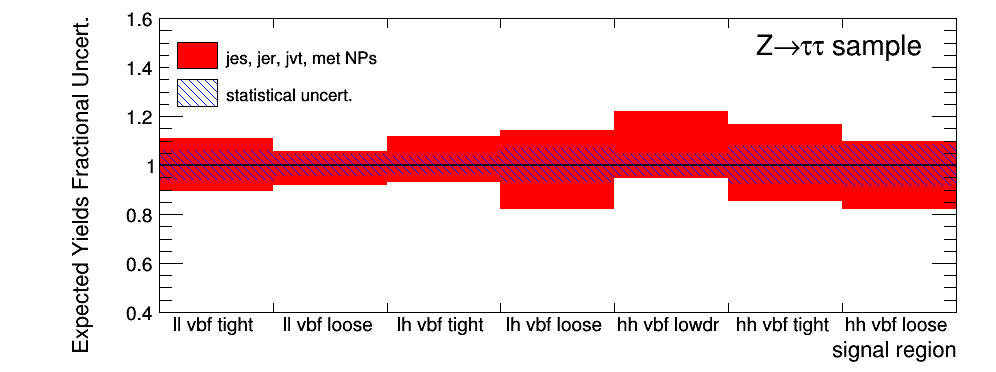

In [7]:
c_j

INFO:ROOT.TCanvas.Print] png file /var/folders/yf/43k_1b814y3d2yx1rqlfxr5c0000gn/T/tmpukqfS9.png has been created


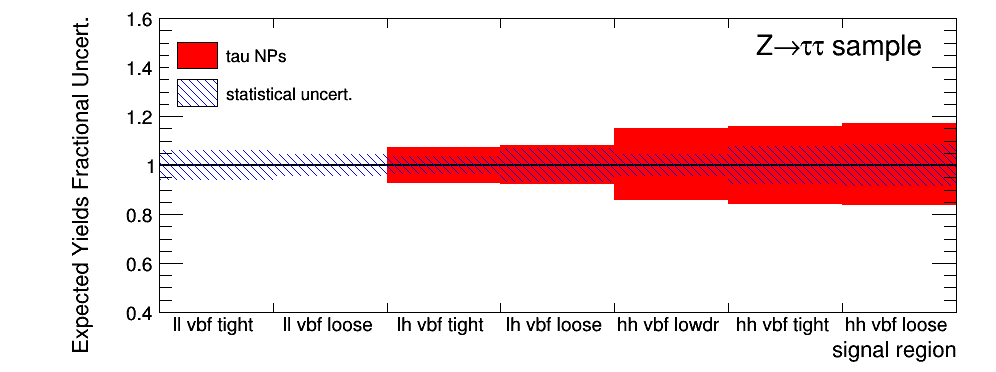

In [8]:
c_t

INFO:ROOT.TCanvas.Print] png file /var/folders/yf/43k_1b814y3d2yx1rqlfxr5c0000gn/T/tmpROkBFM.png has been created


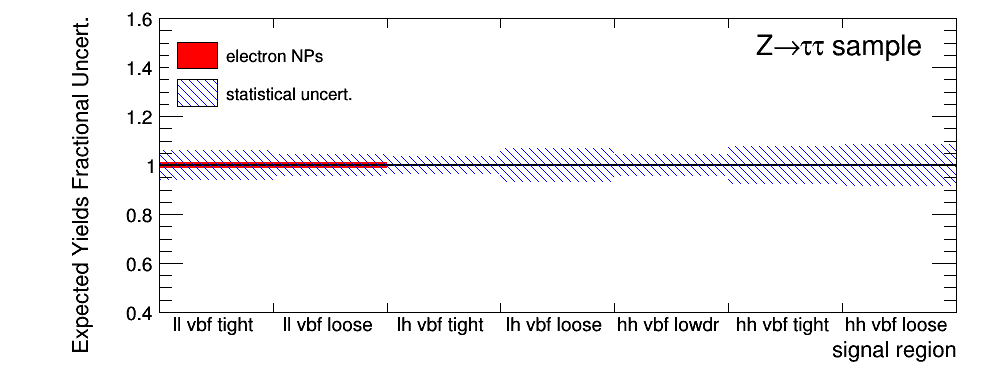

In [9]:
c_e

INFO:ROOT.TCanvas.Print] png file /var/folders/yf/43k_1b814y3d2yx1rqlfxr5c0000gn/T/tmpSBN0QE.png has been created


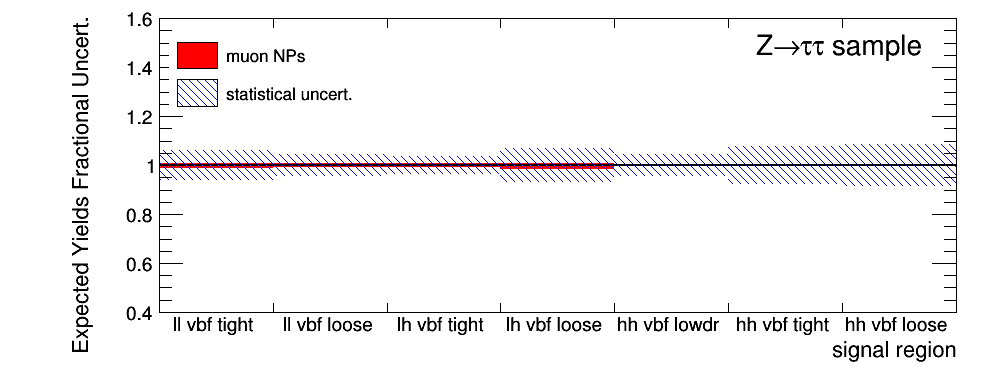

In [10]:
c_m

INFO:ROOT.TCanvas.Print] png file /var/folders/yf/43k_1b814y3d2yx1rqlfxr5c0000gn/T/tmptFfHmj.png has been created


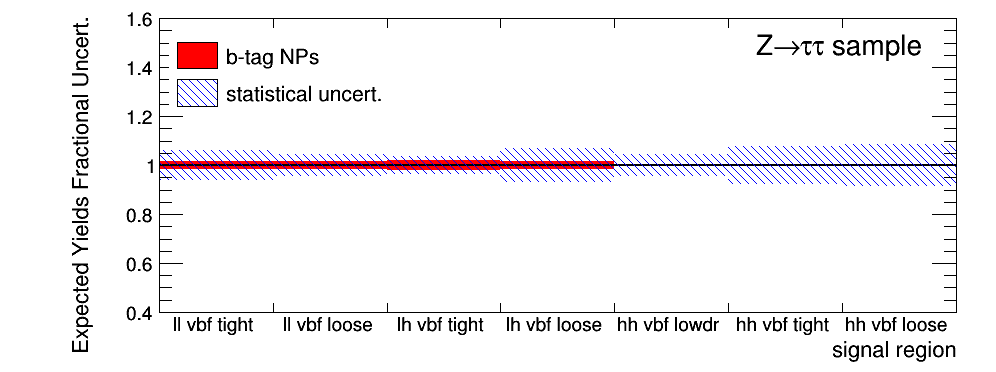

In [11]:
c_b

INFO:ROOT.TCanvas.Print] png file /var/folders/yf/43k_1b814y3d2yx1rqlfxr5c0000gn/T/tmp9V_y5Z.png has been created


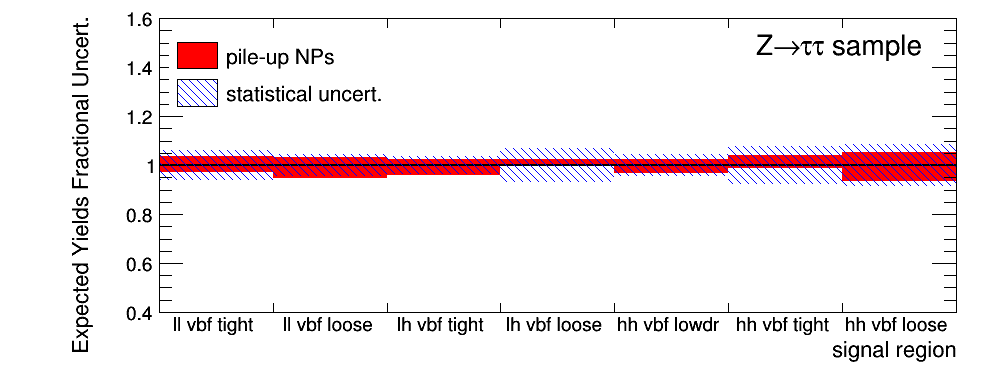

In [12]:
c_pu

In [13]:
c_j.SaveAs('plots/fractional_uncert_ztt_vbf_jet.eps')
c_t.SaveAs('plots/fractional_uncert_ztt_vbf_tau.eps')
c_e.SaveAs('plots/fractional_uncert_ztt_vbf_ele.eps')
c_m.SaveAs('plots/fractional_uncert_ztt_vbf_mu.eps')
c_b.SaveAs('plots/fractional_uncert_ztt_vbf_btag.eps')
c_pu.SaveAs('plots/fractional_uncert_ztt_vbf_pu.eps')

c_j.SaveAs('plots/fractional_uncert_ztt_vbf_jet.pdf')
c_t.SaveAs('plots/fractional_uncert_ztt_vbf_tau.pdf')
c_e.SaveAs('plots/fractional_uncert_ztt_vbf_ele.pdf')
c_m.SaveAs('plots/fractional_uncert_ztt_vbf_mu.pdf')
c_b.SaveAs('plots/fractional_uncert_ztt_vbf_btag.pdf')
c_pu.SaveAs('plots/fractional_uncert_ztt_vbf_pu.pdf')




#ztt = lh_meas.get_sample('Ztt')

INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_vbf_jet.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_vbf_tau.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_vbf_ele.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_vbf_mu.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_vbf_btag.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_vbf_pu.eps has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_vbf_jet.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_vbf_tau.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_vbf_ele.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_vbf_mu.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_vbf_btag.pdf has been created


In [14]:
c_j = np_summary_plot(measurements, category_vbf_list, jet_nps,      mass_window=(100, 150), sys_name='jes, jer, jvt, met')
c_t = np_summary_plot(measurements, category_vbf_list, tau_nps,      mass_window=(100, 150), sys_name='tau')
c_e = np_summary_plot(measurements, category_vbf_list, electron_nps, mass_window=(100, 150), sys_name='electron')
c_m = np_summary_plot(measurements, category_vbf_list, muon_nps,     mass_window=(100, 150), sys_name='muon')
c_b = np_summary_plot(measurements, category_vbf_list, btag_nps,     mass_window=(100, 150), sys_name='b-tag')
c_pu= np_summary_plot(measurements, category_vbf_list, pu_nps,       mass_window=(100, 150), sys_name='pile-up')

c_j = np_summary_plot(measurements, category_vbf_list, jet_nps,      mass_window=(100, 150), sys_name='jes, jer, jvt, met')
c_t = np_summary_plot(measurements, category_vbf_list, tau_nps,      mass_window=(100, 150), sys_name='tau')
c_e = np_summary_plot(measurements, category_vbf_list, electron_nps, mass_window=(100, 150), sys_name='electron')
c_m = np_summary_plot(measurements, category_vbf_list, muon_nps,     mass_window=(100, 150), sys_name='muon')
c_b = np_summary_plot(measurements, category_vbf_list, btag_nps,     mass_window=(100, 150), sys_name='b-tag')
c_pu= np_summary_plot(measurements, category_vbf_list, pu_nps,       mass_window=(100, 150), sys_name='pile-up')

c_j.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_jet.eps')
c_t.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_tau.eps')
c_e.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_ele.eps')
c_m.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_mu.eps')
c_b.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_btag.eps')
c_pu.SaveAs('plots/fractional_uncert_ztt_mass_window_vbf_pu.eps')

c_j.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_jet.pdf')
c_t.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_tau.pdf')
c_e.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_ele.pdf')
c_m.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_mu.pdf')
c_b.SaveAs ('plots/fractional_uncert_ztt_mass_window_vbf_btag.pdf')
c_pu.SaveAs('plots/fractional_uncert_ztt_mass_window_vbf_pu.pdf')




llAll_cba_vbf_tight_signal Mass window = [100.0, 151.0]


	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low
llAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]


	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low
mhAll_cba_vbf_tight_signal Mass window = [100.0, 151.0]
mhAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
hhAll_cba_vbf_highdr_loose_signal Mass window = [100.0, 155.0]


llAll_cba_vbf_tight_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong 

	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_total_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_total_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf

hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_lowdr_signa

hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_trigger_high
	 wrong nam

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_trigger_hi

hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_high
	 w

	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_low
hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hh

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signa

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_syslowpt_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_syslowpt_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_stat_low
	 wrong name: hhAll_

mhAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_high


	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_hig

	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_low
hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_vbf_high

hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
hhAll_cba_vbf_highdr_loose_signal Mass window = [100.0, 155.0]
llAll_cba_vbf_tight_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low


llAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low
mhAll_cba_vbf_tight_signal Mass window = [100.0, 151.0]
mhAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
hhAll_cba_vbf_highdr_loose_signal Mass window = [100.0, 155.0]


llAll_cba_vbf_tight_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong 

	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_jetid_total_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_jetid_total_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal

mhAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_e4scintillator_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_e4scintillator_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_larcalib_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_larcalib_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_larcalib_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_larcalib_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_vbf_lowd

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_e4scintillator_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_e4scintillator_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_larcalib_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_larcalib_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_larcalib_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_larcalib_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_lartemperature_ex

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_e4scintillator_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_e4scintillator_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_larcalib_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_larcalib_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_larcalib_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_larcalib_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_vbf_h

hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isosys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_high
	 w

	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_low
hhAll_cba_vbf_highdr_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: 

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: 

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_

mhAll_cba_vbf_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_vbf_lowdr_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_low


	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_2_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_extrapolation_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_lowdr_signal,

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_4_low
hhAll_cba_vbf_highdr_loose_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_b_0

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_1_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Z

INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_vbf_jet.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_vbf_tau.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_vbf_ele.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_vbf_mu.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_vbf_btag.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_vbf_pu.eps has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_vbf_jet.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_vbf_tau.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_vbf_ele.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_

hhAll_cba_vbf_highdr_loose_signal Mass window = [100.0, 155.0]


In [15]:
#for k in sorted(all_systs.keys()):
#    print "('{0}', '{1}')".format(all_systs[k]['high'], all_systs[k]['low'])

In [16]:
c_j = np_summary_plot(measurements, category_bst_list, jet_nps, sys_name='jes, jer, jvt, met')
c_t = np_summary_plot(measurements, category_bst_list, tau_nps, sys_name='tau')
c_e = np_summary_plot(measurements, category_bst_list, electron_nps, sys_name='electron')
c_m = np_summary_plot(measurements, category_bst_list, muon_nps, sys_name='muon')
c_b = np_summary_plot(measurements, category_bst_list, btag_nps, sys_name='b-tag')
c_pu= np_summary_plot(measurements, category_bst_list, pu_nps, sys_name='pile-up')

c_j.SaveAs( 'plots/fractional_uncert_ztt_bst_jet.eps')
c_t.SaveAs( 'plots/fractional_uncert_ztt_bst_tau.eps')
c_e.SaveAs( 'plots/fractional_uncert_ztt_bst_ele.eps')
c_m.SaveAs( 'plots/fractional_uncert_ztt_bst_mu.eps')
c_b.SaveAs( 'plots/fractional_uncert_ztt_bst_btag.eps')
c_pu.SaveAs('plots/fractional_uncert_ztt_bst_pu.eps')

c_j.SaveAs( 'plots/fractional_uncert_ztt_bst_jet.pdf')
c_t.SaveAs( 'plots/fractional_uncert_ztt_bst_tau.pdf')
c_e.SaveAs( 'plots/fractional_uncert_ztt_bst_ele.pdf')
c_m.SaveAs( 'plots/fractional_uncert_ztt_bst_mu.pdf')
c_b.SaveAs( 'plots/fractional_uncert_ztt_bst_btag.pdf')
c_pu.SaveAs('plots/fractional_uncert_ztt_bst_pu.pdf')




	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_tight_sign

	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_total_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_total_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_total_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_total_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_highpt_hig

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_trigger_low

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_trigger_low

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low


	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_t

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_scale_high
	 wrong n

	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_syslowpt_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_syslowpt_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_e

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signa

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_1_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_1_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_2_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_2_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_2_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_2_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_2_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_extrapolation_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_extrapolation_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_extrapolation_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_extrapolation_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_boost_loose_signa

INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_bst_jet.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_bst_tau.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_bst_ele.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_bst_mu.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_bst_btag.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_bst_pu.eps has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_bst_jet.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_bst_tau.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_bst_ele.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_bst_mu.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_bst_btag.pdf has been created


In [17]:
c_j = np_summary_plot(measurements, category_bst_list, jet_nps,      mass_window=(100, 150), sys_name='jes, jer, jvt, met')
c_t = np_summary_plot(measurements, category_bst_list, tau_nps,      mass_window=(100, 150), sys_name='tau')
c_e = np_summary_plot(measurements, category_bst_list, electron_nps, mass_window=(100, 150), sys_name='electron')
c_m = np_summary_plot(measurements, category_bst_list, muon_nps,     mass_window=(100, 150), sys_name='muon')
c_b = np_summary_plot(measurements, category_bst_list, btag_nps,     mass_window=(100, 150), sys_name='b-tag')
c_pu= np_summary_plot(measurements, category_bst_list, pu_nps,       mass_window=(100, 150), sys_name='pile-up')

c_j.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_jet.eps')
c_t.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_tau.eps')
c_e.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_ele.eps')
c_m.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_mu.eps')
c_b.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_btag.eps')
c_pu.SaveAs('plots/fractional_uncert_ztt_mass_window_bst_pu.eps')
c_j.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_jet.pdf')
c_t.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_tau.pdf')
c_e.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_ele.pdf')
c_m.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_mu.pdf')
c_b.SaveAs( 'plots/fractional_uncert_ztt_mass_window_bst_btag.pdf')
c_pu.SaveAs('plots/fractional_uncert_ztt_mass_window_bst_pu.pdf')




llAll_cba_boost_tight_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_noisefwd_low


llAll_cba_boost_loose_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_noisefwd_low
mhAll_cba_boost_tight_signal Mass window = [100.0, 151.0]
mhAll_cba_boost_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_boost_tight_signal Mass window = [100.0, 155.0]
hhAll_cba_boost_loose_signal Mass window = [100.0, 155.0]


llAll_cba_boost_tight_signal Mass window = [100.0, 151.0]
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff

	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_highpt_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_total_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_total_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_jetid_total_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_jetid_total_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong nam

mhAll_cba_boost_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_boost_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_high


	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_trigger_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_trigger_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_res_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_r

	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_reco_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_reco_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_reco_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_reco_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_trigger_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_trigger_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_trigger_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_res_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_r

mhAll_cba_boost_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_boost_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isostat_low


	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_boost_tight

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_scale_low
hhAll_cba_boost_loose_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_isostat_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_isostat_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_isosys_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_isosys_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_loose_signal,

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhA

mhAll_cba_boost_loose_signal Mass window = [100.0, 151.0]
hhAll_cba_boost_tight_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_1_high


	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_boost_tight_signal

	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_4_low
hhAll_cba_boost_loose_signal Mass window = [100.0, 155.0]
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_1_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_2_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_2_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_boost_loos

INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_bst_jet.eps has been created


	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_1_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_1_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_2_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_2_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttE

INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_bst_tau.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_bst_ele.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_bst_mu.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_bst_btag.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/fractional_uncert_ztt_mass_window_bst_pu.eps has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_bst_jet.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_bst_tau.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_bst_ele.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_bst_mu.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/fractional_uncert_ztt_mass_window_b

In [23]:
all_nps = jet_nps + tau_nps + electron_nps + muon_nps + btag_nps + pu_nps

def mmc_ratio_plot(
    meas_list, 
    cats_list, 
    systematics, 
    sys_name='jet', 
    sample_name='Ztt',
    mass_cut=100):

    
    if len(meas_list) != len(cats_list):
        raise ValueError('not the same number of measurements and category lists')


    length = sum(len(x) for x in cats_list)

    h_nom        = ROOT.TH1F(uuid.uuid4().hex, '', length, 0, length)
    h_lo_stat    = ROOT.TH1F(uuid.uuid4().hex, '', length, 0, length)
    h_hi_stat    = ROOT.TH1F(uuid.uuid4().hex, '', length, 0, length)
    h_lo_statsys = ROOT.TH1F(uuid.uuid4().hex, '', length, 0, length)
    h_hi_statsys = ROOT.TH1F(uuid.uuid4().hex, '', length, 0, length)

    h_nom        .Sumw2()
    h_lo_stat    .Sumw2()
    h_hi_stat    .Sumw2()
    h_lo_statsys .Sumw2()
    h_hi_statsys .Sumw2()



    g_stat     = ROOT.TGraphAsymmErrors(length)
    g_stat_sys = ROOT.TGraphAsymmErrors(length)

    meas_cat_unnested = []
    for meas, cats in zip(meas_list, cats_list):
        for cat in cats:
            meas_cat_unnested.append((meas, cat))
                          
    # iterate over measurements and category list
    for im, (meas, cat) in enumerate(meas_cat_unnested):
        samp = meas.get_sample(sample_name)

        xedges = list(samp.hist(meas.rfile, cat.cats[0]).xedges())
        bin_range = meas.bin_range(cat.cats[0], 70, mass_cut)
        #print bin_range
        low_mmc_range = (bin_range[0], bin_range[1])
        high_mmc_range = (bin_range[1], len(xedges) + 1)
        
        
        # retrieve yields as tuple (nominal, error)
        yields_low = samp.yields(meas.rfile, cat.cats, name='nominal', bin_range=low_mmc_range)
        yields_high = samp.yields(meas.rfile, cat.cats, name='nominal', bin_range=high_mmc_range)

        
        h_nom.GetXaxis().SetBinLabel(im  + 1, cat.name)    
        h_nom.SetBinContent(im + 1, 1000)    
        h_nom.SetBinError(im + 1, 0)    

        h_lo_stat.GetXaxis().SetBinLabel(im  + 1, cat.name)    
        h_lo_stat.SetBinContent(im + 1, yields_low[0])    
        h_lo_stat.SetBinError(im + 1, yields_low[1])    
        h_hi_stat.GetXaxis().SetBinLabel(im  + 1, cat.name)    
        h_hi_stat.SetBinContent(im + 1, yields_high[0])    
        h_hi_stat.SetBinError(im + 1, yields_high[1])    

        h_lo_statsys.GetXaxis().SetBinLabel(im  + 1, cat.name)    
        h_lo_statsys.SetBinContent(im + 1, yields_low[0])    

        h_hi_statsys.GetXaxis().SetBinLabel(im  + 1, cat.name)    
        h_hi_statsys.SetBinContent(im + 1, yields_high[0])    

        sqr_env_high = 0
        sqr_env_low  = 0

        #print im + 1, cat.name, 'nominal', samp.yields(meas.rfile, cat.cats, name='nominal')[0]
        for (high, low) in systematics:
            yields_low_sys_high = samp.yields(meas.rfile, cat.cats, name=high, bin_range=low_mmc_range)[0]

            yields_high_sys_high = samp.yields(meas.rfile, cat.cats, name=high, bin_range=high_mmc_range)[0]

            if low != '':
                yields_low_sys_low  = samp.yields(meas.rfile, cat.cats, name=low, bin_range=low_mmc_range)[0]
                yields_high_sys_low = samp.yields(meas.rfile, cat.cats, name=low, bin_range=high_mmc_range)[0]
            else:
                yields_low_sys_low  = yields_low_sys_high
                yields_high_sys_low = yields_high_sys_high

            if yields_low_sys_low <= 0.:
                yields_low_sys_low = yields_low[0]

            if yields_high_sys_low <= 0.:
                yields_high_sys_low = yields_high[0]

                
            yields_low_env_tmp = max(
                abs(yields_low_sys_high - yields_low[0]),
                abs(yields_low_sys_low - yields_low[0]))

            yields_high_env_tmp = max(
                abs(yields_high_sys_high - yields_high[0]),
                abs(yields_high_sys_low - yields_high[0]))


#            if 'lh' in cat.name:
#                print high,'\t', yields_high[0], yields_high_env_tmp, yields_high_sys_high, yields_high_sys_low
#                print high,'\t', yields_low[0], yields_low_env_tmp, yields_low_sys_high, yields_low_sys_low



            sqr_env_high += (yields_high_env_tmp)**2
            sqr_env_low  += (yields_low_env_tmp)**2

        err_lo = math.sqrt(sqr_env_low + yields_low[1]**2)
        err_hi = math.sqrt(sqr_env_high + yields_high[1]**2)
        print yields_low[0], yields_low[1], err_lo
        h_lo_statsys.SetBinError(im + 1, err_lo)   
        h_hi_statsys.SetBinError(im + 1, err_hi)   


    h_nom.GetYaxis().SetRangeUser(0., 1.2)
    h_nom.GetYaxis().SetTitle('N(m_{MMC} > 100) / N(70 < m_{MMC} < 100)')
    h_nom.GetYaxis().SetTitleOffset(0.5 * h_nom.GetYaxis().GetTitleOffset())
    h_nom.GetYaxis().SetTitleSize(0.6 * h_nom.GetYaxis().GetTitleSize())

    ratio_stat = ROOT.TGraphAsymmErrors(h_hi_stat, h_lo_stat)
    ratio_statsys = ROOT.TGraphAsymmErrors(h_hi_statsys, h_lo_statsys)


    ratio_stat.SetFillStyle(3005)
    ratio_stat.SetFillColor(ROOT.kBlack)
    ratio_statsys.SetFillColor(ROOT.kRed)

    #ratio_statsys.SetMarkerSize(0.0001)
    #ratio_stat.SetMarkerSize(0.0001)
    canv = ROOT.TCanvas(uuid.uuid4().hex, 'np_summary', 1400, 400)
    h_nom.Draw('HIST')
    ratio_statsys.Draw('same P E2')
    ratio_stat.Draw('same P E2')

    canv.RedrawAxis()
    lat_str = 'Z#rightarrow#tau#tau sample, {} nps'.format(sys_name) 
    lat = ROOT.TLatex(
            canv.GetLeftMargin() + 0.02, 
            1 - canv.GetTopMargin() - 0.1,
            lat_str)
    #lat.SetTextSize(20)
    lat.SetNDC(True)
    lat.Draw()
    
    leg = ROOT.TLegend(0.7, 0.8, 1 - canv.GetRightMargin() - 0.02, 1 - canv.GetTopMargin() - 0.02)
    leg.SetNColumns(2)
    leg.AddEntry(ratio_statsys, 'stat #oplus syst', 'f')
    leg.AddEntry(ratio_stat,    'stat', 'f')
    
    leg.Draw()
    canv.RedrawAxis()
    return canv


        

In [24]:
c_r_all = mmc_ratio_plot(measurements, category_bst_list, all_nps, sys_name='all experimental')
c_r_jet = mmc_ratio_plot(measurements, category_bst_list, jet_nps, sys_name='jet')
c_r_tau = mmc_ratio_plot(measurements, category_bst_list, tau_nps, sys_name='tau')

c_r_all.SaveAs('plots/ratio_mmc_eff_bst_allnps.pdf')
c_r_jet.SaveAs('plots/ratio_mmc_eff_bst_jetnps.pdf')
c_r_tau.SaveAs('plots/ratio_mmc_eff_bst_taunps.pdf')
c_r_all.SaveAs('plots/ratio_mmc_eff_bst_allnps.eps')
c_r_jet.SaveAs('plots/ratio_mmc_eff_bst_jetnps.eps')
c_r_tau.SaveAs('plots/ratio_mmc_eff_bst_taunps.eps')


c_r_all = mmc_ratio_plot(measurements, category_vbf_list, all_nps, sys_name='all experimental')
c_r_jet = mmc_ratio_plot(measurements, category_vbf_list, jet_nps, sys_name='jet')
c_r_tau = mmc_ratio_plot(measurements, category_vbf_list, tau_nps, sys_name='tau')

c_r_all.SaveAs('plots/ratio_mmc_eff_vbf_allnps.pdf')
c_r_jet.SaveAs('plots/ratio_mmc_eff_vbf_jetnps.pdf')
c_r_tau.SaveAs('plots/ratio_mmc_eff_vbf_taunps.pdf')

c_r_all.SaveAs('plots/ratio_mmc_eff_vbf_allnps.eps')
c_r_jet.SaveAs('plots/ratio_mmc_eff_vbf_jetnps.eps')
c_r_tau.SaveAs('plots/ratio_mmc_eff_vbf_taunps.eps')






llAll_cba_boost_tight_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low


	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong na

	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_tes_detector_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_tes_detector_high
	 wrong name: llAll_cba_boost_tight_signal

1745.45661736 28.4933440199 118.636774071
llAll_cba_boost_loose_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong na

	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_boost_loose_sig

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_eff_trigger_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_eff_trigger_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_res_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_res_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_low
	 wron

	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEW

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_isosys_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_tight_s

	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_syslowpt_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_syslowpt_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_trigger_stat_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_eff_trigger_stat_low
	 wrong name: hhAll_cba_boost_tight_signal, Z

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_ms_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_ms_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_resbias_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_sagitta_resbias_low
	 wrong name: hhAll_cba_b

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_b_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_b_1_low
	 wrong name: hhAll_cba_boost_tight

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_c_2_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_boost_tight_signal


	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_

	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_2_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_boost_tight_signal, Ztt

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_res_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_res_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_e4scintillator

	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK,

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_sys_low
	 wrong name: hhAll_cba_boo

	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_b_0_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_b_0_low
	 wrong name: hhA

	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_boost_loose_signa

	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_1_low
	 wrong name: hhAll_cba_boost_

INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms


	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_4_low
	 wrong name: hhAll_cba_boost_loose_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_boost_loose_signal, ZttEWK, btag_light_4_low
2802.95809937 48.893642825 495.564067419
llAll_cba_boost_tight_signal Mass window = [70.0, 101.0]


	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, jet_jer_noisefwd_low


1745.45661736 28.4933440199 100.256015227
llAll_cba_boost_loose_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, jet_jer_noisefwd_low
1720.57895947 28.1756899076 128.39837564
mhAll_cba_boost_tight_signal Mass window = [70.0, 101.0]
3851.80133057 45.6902611297 209.40281506
mhAll_cba_boost_loose_signal Mass window = [70.0, 101.0]
2456.0206604 44.5166318417 163.427043856
hhAll_cba_boost_tight_signal Mass window = [70.0, 105.0]
3497.68606567 4

INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms


2802.95809937 48.893642825 148.909120642
llAll_cba_boost_tight_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_eleolr_truehadtau_

	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tight_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_tigh

	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_eleolr_truehadtau_low
	 wrong name:

	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_tes_detector_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_tes_detector_high
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_tes_detector_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_tes_detector_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_tes_detector_low
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_tes_detector_low
	 wrong name: llAll_cba_boost_loose_signal, Ztt, tau_tes_insitu_high
	 wrong name: llAll_cba_boost_loose_signal, ZttEWK, tau_tes_i

INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TCanvas.Print] pdf file plots/ratio_mmc_eff_bst_allnps.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/ratio_mmc_eff_bst_jetnps.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/ratio_mmc_eff_bst_taunps.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/ratio_mmc_eff_bst_allnps.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/ratio_mmc_eff_bst_jetnps.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/ratio_mmc_eff_bst_taunps.eps has been created


2802.95809937 48.893642825 456.871574958
llAll_cba_vbf_tight_signal Mass window = [70.0, 101.0]


	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_

	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_tes_detector_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_tes_detector_hi

	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low


	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_

	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_tes_detector_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_tes_detector_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_tes_detector_hi

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK,

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_e4scintill

	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_isostat_high
	 wrong name: hhAll_cba_v

	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_sys_l

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_ms_high
	 wrong name

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_0_high
	 wrong name

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_c_1_low
	 wrong 

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_0_low
	 wron

	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_lowdr_signal, ZttEWK, btag_light_4_low
153.057785034 7.37306476501 38.8709258337
hhAll_cba_vbf_highdr_tight_signal M

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_eff_iso_low
	 wrong name:

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_h

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_trigger_sys_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_tight_sign

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_sagitta_rho_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_hi

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_b_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_b_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_c_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_highdr_

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_extrapolation_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_extrapolation_from_charm_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Zt

	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_2_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_3_low
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_tight_signal,

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_iso_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_eff_iso_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_eff_iso_low
	 wrong name:

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_res_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_e4scintillator_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2015pre_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, el_es_scale_lartemperature_extra2016pre_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_isostat_high
	 wrong name: hhAll_cba_v

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_statlowpt_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_statlowpt_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_sys_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_si

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_eff_trigger_sys_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_id_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_id_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_ms_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_ms_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_ms_high
	 wr

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_scale_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, mu_es_scale_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_b_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_b_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_b_0_low
	 wrong n

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_1_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_1_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_c_2_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_c_2_high
	 wrong name: hhAll_cba_vbf_highdr_

	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_extrapolation_from_charm_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_0_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_1_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_1_high
	 wrong name: hhAll_cba_vbf_hig

INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms


	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_4_high
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_4_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, Ztt, btag_light_4_low
	 wrong name: hhAll_cba_vbf_highdr_loose_signal, ZttEWK, btag_light_4_low
50.6493024826 5.21967270819 13.9929932306
llAll_cba_vbf_tight_signal Mass window = [70.0, 101.0]


	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, jet_jer_noisefwd_low


45.5785940289 3.66884176776 8.48399917822
llAll_cba_vbf_loose_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_crosscalibfwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, jet_jer_noisefwd_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, jet_jer_noisefwd_low
121.011927724 6.6145196476 15.0445304579
mhAll_cba_vbf_tight_signal Mass window = [70.0, 101.0]
196.83174324 8.62099027319 28.8896485408
mhAll_cba_vbf_loose_signal Mass window = [70.0, 101.0]
105.950063676 9.11181909165 26.2644097282
hhAll_cba_vbf_lowdr_signal Mass window = [70.0, 105.0]
153.057785034 7.37306476501 30.5696076

INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms


50.6493024826 5.21967270819 9.80831325926
llAll_cba_vbf_tight_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAl

	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_tight_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_tight_signal, Ztt, tau_eff_

45.5785940289 3.66884176776 3.66884176776
llAll_cba_vbf_loose_signal Mass window = [70.0, 101.0]
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_trueelectron_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_eleolr_truehadtau_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_eleolr_truehadtau_high
	 wrong name: llAl

	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_highpt_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_high
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_loose_signal, ZttEWK, tau_eff_reco_total_low
	 wrong name: llAll_cba_vbf_loose_signal, Ztt, tau_eff_

INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TGraphAsymmErrors.Divide] Using now the Normal approximation for weighted histograms
INFO:ROOT.TCanvas.Print] pdf file plots/ratio_mmc_eff_vbf_allnps.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/ratio_mmc_eff_vbf_jetnps.pdf has been created
INFO:ROOT.TCanvas.Print] pdf file plots/ratio_mmc_eff_vbf_taunps.pdf has been created
INFO:ROOT.TCanvas.Print] eps file plots/ratio_mmc_eff_vbf_allnps.eps has been created


95.7482466698 7.81013841132 18.5000340213
hhAll_cba_vbf_highdr_loose_signal Mass window = [70.0, 105.0]
50.6493024826 5.21967270819 10.8790700519


INFO:ROOT.TCanvas.Print] eps file plots/ratio_mmc_eff_vbf_jetnps.eps has been created
INFO:ROOT.TCanvas.Print] eps file plots/ratio_mmc_eff_vbf_taunps.eps has been created
